In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(t,y):
    return (t*(np.e**(3*t)))-(2*y)   # TP1 b)
    #return 1 + ((t-y)**2)           # TP1 a)
    #return (2-(2*t*y))/((t**2)+1)   # Ejemplo Euler

def yReal(t):
    return (1/5)*t*(np.e**(3*t))-(1/25)*(np.e**(3*t))+((1/25)*(np.e**(-2*t)))    # TP1 b)
    #return t + (1/(1-t))                                                        # TP1 a)
    #return ((2*t)+1)/((t**2)+1)                                                 # Ejemplo Euler

In [3]:
"""
faprox = Funcion a Aproximar
freal = Funcion Real
h = Tamaño del paso
I = Par [a,b] para calcular los pasos
y0 = Valor iniciar conocido
grafico = Permite realizar o no un grafico
"""

def trapecio(faprox,freal,h,I,y0,grafico):
    # Calculos los pasos con los que aproximar
    #pasos = [I[0]+(i*h) for i in range(1,int((I[1]-I[0])//h)+1)]
    pasos = [i for i in np.arange(I[0]+h,I[1]+h,h)]
    
    # Creo un DataFrame para hacer la tabla y poder graficar luego
    columnas=["t","yAprox","yReal","eLocal","eGlobal"]
    df = pd.DataFrame(np.array([[I[0],y0,y0,0.0,0.0]]),columns=columnas)  
    
    # Usando la "fila anterior" calculo el siguiente resutlado
    for i in range(len(pasos)):        
        t = pasos[i]
        t0 = t-h
        y = float(df["yAprox"].loc[i])
        k1 = f(t0,y)
        k2 = f(t+(h/2),y+(h*k1/2))        
        yaprox = y+((h/6)*(k1+k2))    #Método de Runge Kutta 4
        yreal = freal(t)
        df = df.append(pd.DataFrame(np.array([[t,yaprox,yreal,abs(yaprox-y),abs(yaprox-yreal)]]),columns=columnas),ignore_index=True)
    
    # Hago un print de la tabla
    if grafico:
        print(df)
    
    # Grafico
    if grafico:
        graficar(df)   
    
def graficar(df):
    fig = plt.figure(figsize=[10,10])
    ax1 = fig.add_subplot(2,1,1)
    ax1.plot(df["t"],df["yAprox"])
    ax1.plot(df["t"],df["yReal"])
    ax1.legend(labels=["Aproximado","Real"]) #loc="upper left" - Para ubicar el Legend

    ax1 = fig.add_subplot(2,1,2)
    ax1.plot(df['t'],df["eLocal"])
    ax1.plot(df['t'],df['eGlobal'])
    ax1.legend(labels=["Error Local","Error Global"])

    plt.show()

      t    yAprox     yReal    eLocal   eGlobal
0  0.00  0.000000  0.000000  0.000000  0.000000
1  0.25  0.048128  0.045431  0.048128  0.002697
2  0.50  0.227462  0.283617  0.179333  0.056155
3  0.75  0.767608  1.052576  0.540147  0.284968
4  1.00  2.247923  3.219099  1.480314  0.971177


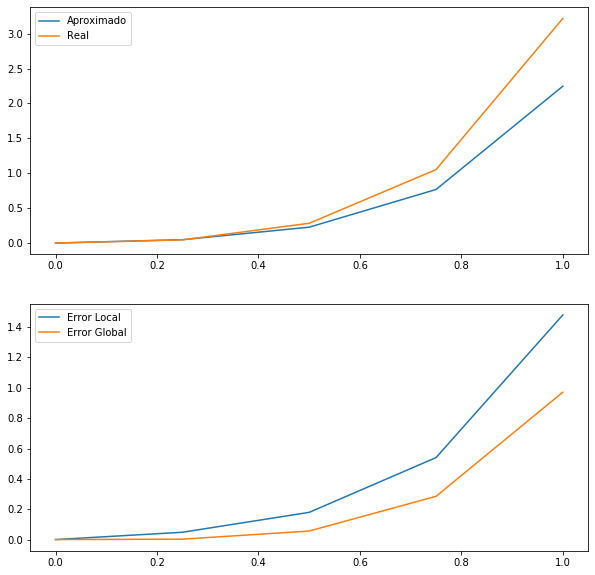

In [4]:
I = [0.0,1.0]    
y0 = 0.0
h = 0.25
trapecio(f,yReal,h,I,y0,True)